In [1]:
import numpy as np
import gzip
import pickle
import sys
import copy
import os.path
from copy import deepcopy

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf

# HIBP normal

In [2]:
with open('results/split_mnist_res5_hibp_l2_normal.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_h10', 'vcl_h5', 'vcl_h50', 'uncerts_ibp', 'uncerts_vcl_h5', 'uncerts_vcl_h10', 'uncerts_vcl_h50', 'Z'])

In [25]:
with open('results/split_mnist_res5_normal_l2_ibp.pkl', 'rb') as input_file:
    d_baselines = pickle.load(input_file)
d_baselines.keys()

dict_keys(['vcl_ibp', 'vcl_h10', 'vcl_h5', 'vcl_h50', 'uncerts_ibp', 'uncerts_vcl_h5', 'uncerts_vcl_h10', 'uncerts_vcl_h50', 'Z'])

In [29]:
hibp_acc.shape

(1, 5, 5)

In [26]:
hibp_acc = d['vcl_ibp'] # 5, 5, 5
ibp_acc = d_baselines['vcl_ibp']
vcl_result = d_baselines['vcl_h10']
vcl_result_h5 = d_baselines['vcl_h5']
vcl_result_h50 = d_baselines['vcl_h50']
_hibp_acc = np.mean(hibp_acc, 0)
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result = np.mean(vcl_result, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
__hibp_acc = np.nanmean(hibp_acc, (0,1))
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result = np.nanmean(vcl_result, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))

In [27]:
_ibp_acc

array([[0.99933806,        nan,        nan,        nan,        nan],
       [0.64548463, 0.9798237 ,        nan,        nan,        nan],
       [0.70316785, 0.8424094 , 0.99551761,        nan,        nan],
       [0.67432624, 0.47717924, 0.87001067, 0.9958711 ,        nan],
       [0.58241135, 0.49539667, 0.94364995, 0.9326284 , 0.9813414 ]])

In [28]:
_hibp_acc

array([[0.97789276,        nan,        nan,        nan,        nan],
       [0.94073377, 0.84489594,        nan,        nan,        nan],
       [0.94073377, 0.81367691, 0.86585366,        nan,        nan],
       [0.75776105, 0.83349851, 0.70254507, 0.91765873,        nan],
       [0.7883349 , 0.68632309, 0.46341463, 0.90575397, 0.84646878]])

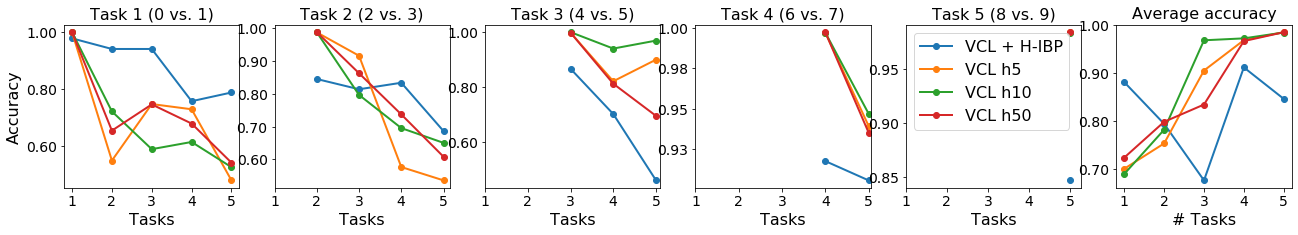

In [43]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_hibp_acc[:, i]))+1, _hibp_acc[:, i], label='VCL + H-IBP', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result[:, i]))+1, _vcl_result[:, i], label='VCL h10', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__hibp_acc))+1, __hibp_acc, label='VCL + H-IBP', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result, label='VCL h10', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/hibp_normal_all.pdf", bbox_inches='tight')
fig.show()

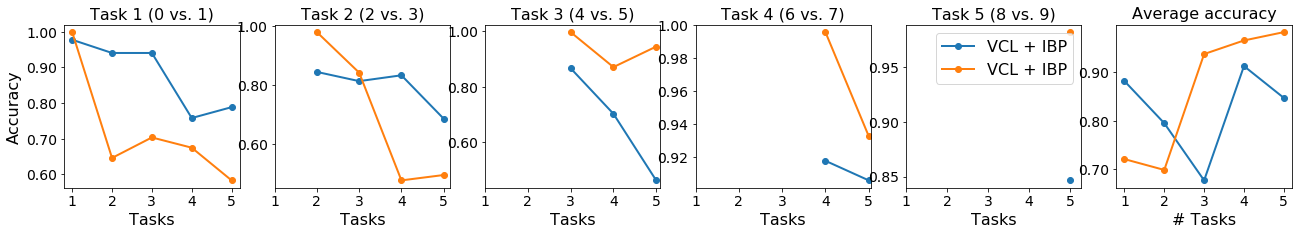

In [44]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_hibp_acc[:, i]))+1, _hibp_acc[:, i], label='VCL + H-IBP', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='VCL + IBP', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__hibp_acc))+1, __hibp_acc, label='VCL + H-IBP', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='VCL + IBP', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/hibp_v_ibp_normal_all.pdf", bbox_inches='tight')
fig.show()

In [45]:
print("Overall accuracies H-IBP: {}".format(np.nanmean(hibp_acc)))
print("Overall accuracies IBP: {}".format(np.nanmean(ibp_acc)))
print("Overall accuracies VCL h5: {}".format(np.nanmean(vcl_result_h5)))
print("Overall accuracies VCL h10: {}".format(np.nanmean(vcl_result)))
print("Overall accuracies VCL h50: {}".format(np.nanmean(vcl_result_h50)))

Overall accuracies H-IBP: 0.8190363698560185
Overall accuracies IBP: 0.8079037513294365
Overall accuracies VCL h5: 0.8106542539356661
Overall accuracies VCL h10: 0.8276488591940505
Overall accuracies VCL h50: 0.8159615739375855


In [51]:
Z_hibp = d['Z'][0]
len(Z_hibp)

10

In [52]:
Z_hibp[0].shape

(1, 2126, 100)

In [50]:
Z_ibp = d_baselines['Z']
len(Z_ibp[0])

10

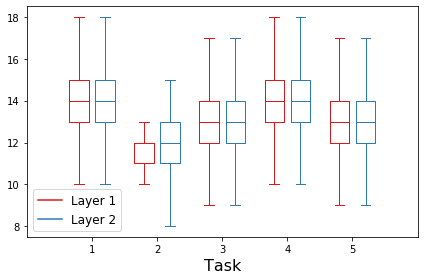

In [68]:
lw = 2

grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 16
tick_size = 12
legend_size = 12

num_layers = 2
num_tasks = 5
# fig, ax = plt.subplots(1, num_layers, figsize=(8, 4))
# ax[0].boxplot([np.sum(np.asarray(np.squeeze(Z_hibp[2*i] > 0.1)).astype(int), axis=1) for i in range(num_tasks)],
#                 labels=np.arange(5)+1)
# ax[1].boxplot([np.sum(np.asarray(np.squeeze(Z_hibp[2*i + 1] > 0.1)).astype(int), axis=1) for i in range(num_tasks)],
#                 labels=np.arange(5)+1)

# for i in range(num_layers):
#     ax[i].set_title("Layer {}".format(i+1), fontsize=title_size)
#     ax[i].set_xlabel('Task', fontsize=legend_size)
# #plt.savefig('plots/Zs_{0}.pdf'.format(tag), bbox_inches='tight')

ticks = [str(i) for i in np.arange(5)+1]

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()
bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(Z_hibp[2*i] > 0.1)).astype(int), axis=1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(Z_hibp[2*i + 1] > 0.1)).astype(int), axis=1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Layer 1')
plt.plot([], c='#2C7BB6', label='Layer 2')
plt.legend(fontsize=legend_size)

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
#plt.savefig('plots/Zs_{0}.pdf'.format(tag), bbox_inches='tight')
plt.show()

In [85]:
num_runs = 5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_ibp[i][j])
    _Z_ibp.append(tmp)

In [91]:
len(_Z_ibp)

10

In [92]:
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_ibp[0].shape

(5, 2115, 100)

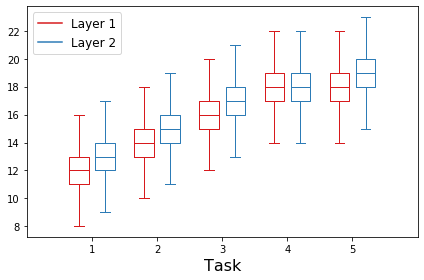

In [115]:
lw = 2

grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 16
tick_size = 12
legend_size = 12

num_layers = 2
num_tasks = 5
ticks = [str(i) for i in np.arange(5)+1]

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()
bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Layer 1')
plt.plot([], c='#2C7BB6', label='Layer 2')
plt.legend(fontsize=legend_size)

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
#plt.savefig('plots/Zs_{0}.pdf'.format(tag), bbox_inches='tight')
plt.show()

# HIBP random

In [116]:
with open('results/split_mnist_res5_hibp_l2_random.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_h10', 'vcl_h5', 'vcl_h50', 'uncerts_ibp', 'uncerts_vcl_h5', 'uncerts_vcl_h10', 'uncerts_vcl_h50', 'Z'])

In [117]:
with open('results/split_mnist_res5_random_l2_ibp.pkl', 'rb') as input_file:
    d_baselines = pickle.load(input_file)
d_baselines.keys()

dict_keys(['vcl_ibp', 'vcl_h10', 'vcl_h5', 'vcl_h50', 'uncerts_ibp', 'uncerts_vcl_h5', 'uncerts_vcl_h10', 'uncerts_vcl_h50', 'Z'])

In [118]:
hibp_acc = d['vcl_ibp'] # 5, 5, 5
ibp_acc = d_baselines['vcl_ibp']
vcl_result = d_baselines['vcl_h10']
vcl_result_h5 = d_baselines['vcl_h5']
vcl_result_h50 = d_baselines['vcl_h50']
_hibp_acc = np.mean(hibp_acc, 0)
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result = np.mean(vcl_result, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
__hibp_acc = np.nanmean(hibp_acc, (0,1))
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result = np.nanmean(vcl_result, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))

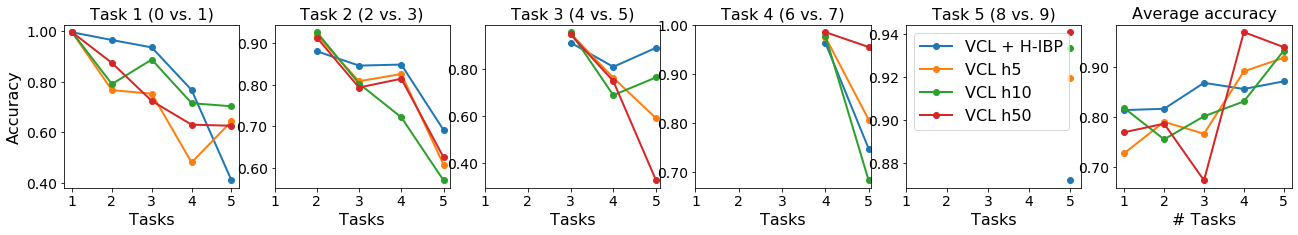

In [119]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_hibp_acc[:, i]))+1, _hibp_acc[:, i], label='VCL + H-IBP', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result[:, i]))+1, _vcl_result[:, i], label='VCL h10', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__hibp_acc))+1, __hibp_acc, label='VCL + H-IBP', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result, label='VCL h10', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/hibp_random_all.pdf", bbox_inches='tight')
fig.show()

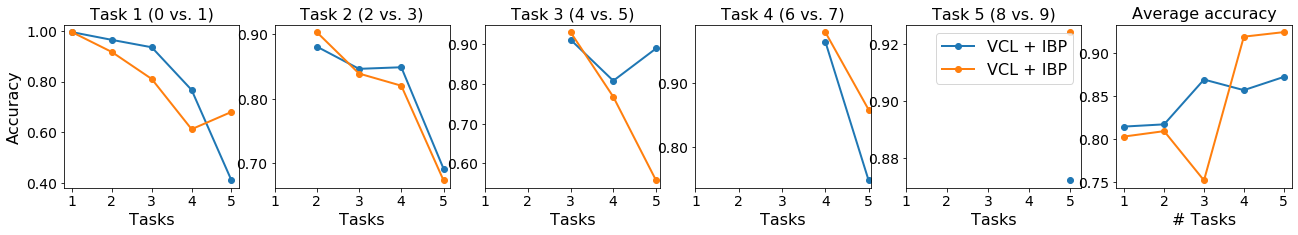

In [120]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_hibp_acc[:, i]))+1, _hibp_acc[:, i], label='VCL + H-IBP', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='VCL + IBP', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__hibp_acc))+1, __hibp_acc, label='VCL + H-IBP', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='VCL + IBP', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/hibp_v_ibp_normal_all.pdf", bbox_inches='tight')
fig.show()

In [121]:
print("Overall accuracies H-IBP: {}".format(np.nanmean(hibp_acc)))
print("Overall accuracies IBP: {}".format(np.nanmean(ibp_acc)))
print("Overall accuracies VCL h5: {}".format(np.nanmean(vcl_result_h5)))
print("Overall accuracies VCL h10: {}".format(np.nanmean(vcl_result)))
print("Overall accuracies VCL h50: {}".format(np.nanmean(vcl_result_h50)))

Overall accuracies H-IBP: 0.8353688928141751
Overall accuracies IBP: 0.8176637574025757
Overall accuracies VCL h5: 0.7867254142596155
Overall accuracies VCL h10: 0.8075321851108355
Overall accuracies VCL h50: 0.7930456971134802


In [124]:
Z_hibp = d['Z'][0]
Z_ibp = d_baselines['Z']
len(Z_ibp[0])

10

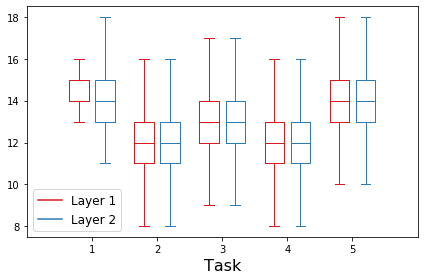

In [125]:
lw = 2

grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 16
tick_size = 12
legend_size = 12

num_layers = 2
num_tasks = 5
# fig, ax = plt.subplots(1, num_layers, figsize=(8, 4))
# ax[0].boxplot([np.sum(np.asarray(np.squeeze(Z_hibp[2*i] > 0.1)).astype(int), axis=1) for i in range(num_tasks)],
#                 labels=np.arange(5)+1)
# ax[1].boxplot([np.sum(np.asarray(np.squeeze(Z_hibp[2*i + 1] > 0.1)).astype(int), axis=1) for i in range(num_tasks)],
#                 labels=np.arange(5)+1)

# for i in range(num_layers):
#     ax[i].set_title("Layer {}".format(i+1), fontsize=title_size)
#     ax[i].set_xlabel('Task', fontsize=legend_size)
# #plt.savefig('plots/Zs_{0}.pdf'.format(tag), bbox_inches='tight')

ticks = [str(i) for i in np.arange(5)+1]

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()
bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(Z_hibp[2*i] > 0.1)).astype(int), axis=1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(Z_hibp[2*i + 1] > 0.1)).astype(int), axis=1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Layer 1')
plt.plot([], c='#2C7BB6', label='Layer 2')
plt.legend(fontsize=legend_size)

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
#plt.savefig('plots/Zs_{0}.pdf'.format(tag), bbox_inches='tight')
plt.show()

In [126]:
num_runs = 5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_ibp[i][j])
    _Z_ibp.append(tmp)
    
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_ibp[0].shape

(5, 2185, 100)

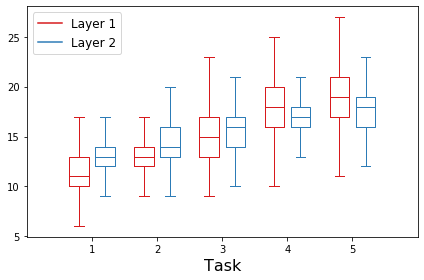

In [127]:
lw = 2

grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 16
tick_size = 12
legend_size = 12

num_layers = 2
num_tasks = 5
ticks = [str(i) for i in np.arange(5)+1]

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()
bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Layer 1')
plt.plot([], c='#2C7BB6', label='Layer 2')
plt.legend(fontsize=legend_size)

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
#plt.savefig('plots/Zs_{0}.pdf'.format(tag), bbox_inches='tight')
plt.show()

# HIBP background MNIST

In [128]:
with open('results/split_mnist_res5_hibp_l2_background.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['vcl_ibp', 'vcl_h10', 'vcl_h5', 'vcl_h50', 'uncerts_ibp', 'uncerts_vcl_h5', 'uncerts_vcl_h10', 'uncerts_vcl_h50', 'Z'])

In [129]:
with open('results/split_mnist_res5_background_l2_ibp.pkl', 'rb') as input_file:
    d_baselines = pickle.load(input_file)
d_baselines.keys()

dict_keys(['vcl_ibp', 'vcl_h10', 'vcl_h5', 'vcl_h50', 'uncerts_ibp', 'uncerts_vcl_h5', 'uncerts_vcl_h10', 'uncerts_vcl_h50', 'Z'])

In [130]:
hibp_acc = d['vcl_ibp'] # 5, 5, 5
ibp_acc = d_baselines['vcl_ibp']
vcl_result = d_baselines['vcl_h10']
vcl_result_h5 = d_baselines['vcl_h5']
vcl_result_h50 = d_baselines['vcl_h50']
_hibp_acc = np.mean(hibp_acc, 0)
_ibp_acc = np.mean(ibp_acc, 0)
_vcl_result = np.mean(vcl_result, 0)
_vcl_result_h5 = np.mean(vcl_result_h5, 0)
_vcl_result_h50 = np.mean(vcl_result_h50, 0)
__hibp_acc = np.nanmean(hibp_acc, (0,1))
__ibp_acc = np.nanmean(ibp_acc, (0,1))
__vcl_result = np.nanmean(vcl_result, (0,1))
__vcl_result_h5 = np.nanmean(vcl_result_h5, (0,1))
__vcl_result_h50 = np.nanmean(vcl_result_h50, (0,1))

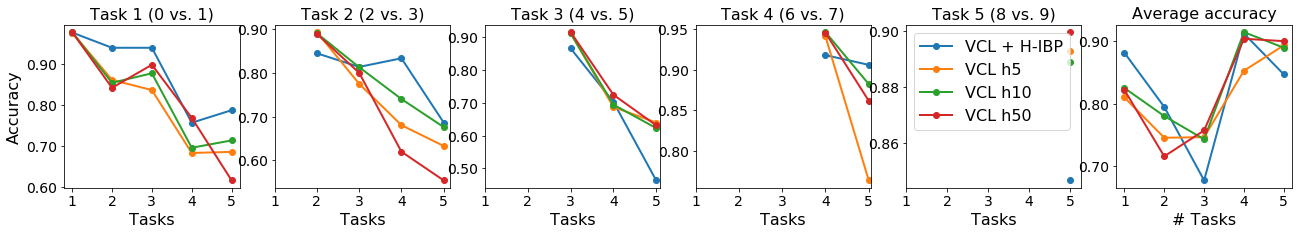

In [131]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_hibp_acc[:, i]))+1, _hibp_acc[:, i], label='VCL + H-IBP', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h5[:, i]))+1, _vcl_result_h5[:, i], label='VCL h5', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result[:, i]))+1, _vcl_result[:, i], label='VCL h10', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_vcl_result_h50[:, i]))+1, _vcl_result_h50[:, i], label='VCL h50', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__hibp_acc))+1, __hibp_acc, label='VCL + H-IBP', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result_h5, label='VCL h5', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result, label='VCL h10', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__vcl_result))+1, __vcl_result_h50, label='VCL h50', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/hibp_random_all.pdf", bbox_inches='tight')
fig.show()

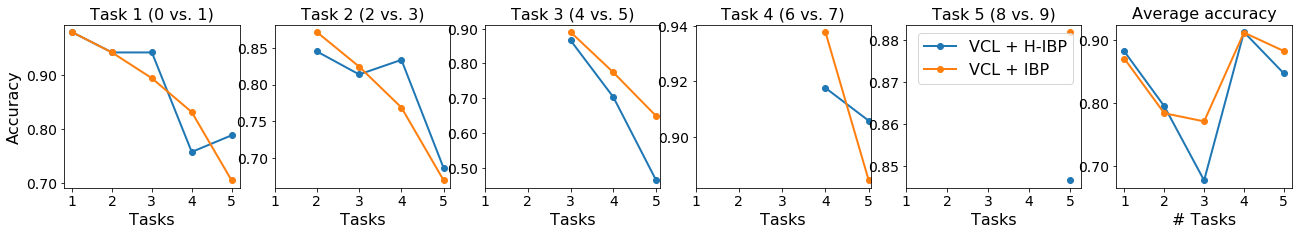

In [132]:
from matplotlib.ticker import FormatStrFormatter
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 14
legend_size = 16

titles = {0: "Task 1 (0 vs. 1)",
          1: "Task 2 (2 vs. 3)",
          2: "Task 3 (4 vs. 5)",
          3: "Task 4 (6 vs. 7)",
          4: "Task 5 (8 vs. 9)"}
no_tasks=5
fig, ax = plt.subplots(1, 6, figsize=(22, 3))
for i in range(no_tasks):
    ax[i].plot(np.arange(len(_hibp_acc[:, i]))+1, _hibp_acc[:, i], label='VCL + H-IBP', marker='o', linewidth=lw)
    ax[i].plot(np.arange(len(_ibp_acc[:, i]))+1, _ibp_acc[:, i], label='VCL + IBP', marker='o', linewidth=lw)
    ax[i].set_title(titles[i], fontsize=legend_size)
    ax[i].set_xticks(range(1, len(_ibp_acc[:,i])+1))
    ax[i].set_xlabel('Tasks', fontsize=legend_size)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax[i].tick_params(labelsize=tick_size)
    if i == 4:
        ax[i].legend(fontsize=legend_size)
    if i == 0:
        ax[i].set_ylabel('Accuracy', fontsize=legend_size)
ax[5].plot(np.arange(len(__hibp_acc))+1, __hibp_acc, label='VCL + H-IBP', marker='o', linewidth=lw)
ax[5].plot(np.arange(len(__ibp_acc))+1, __ibp_acc, label='VCL + IBP', marker='o', linewidth=lw)
ax[5].set_xticks(range(1, len(_ibp_acc)+1))
ax[5].set_title('Average accuracy', fontsize=legend_size)
ax[5].set_xlabel('# Tasks', fontsize=legend_size)
ax[5].tick_params(labelsize=tick_size)
ax[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#ax[5].legend()
#plt.savefig("plots/hibp_v_ibp_normal_all.pdf", bbox_inches='tight')
fig.show()

In [133]:
print("Overall accuracies H-IBP: {}".format(np.nanmean(hibp_acc)))
print("Overall accuracies IBP: {}".format(np.nanmean(ibp_acc)))
print("Overall accuracies VCL h5: {}".format(np.nanmean(vcl_result_h5)))
print("Overall accuracies VCL h10: {}".format(np.nanmean(vcl_result)))
print("Overall accuracies VCL h50: {}".format(np.nanmean(vcl_result_h50)))

Overall accuracies H-IBP: 0.8190363698560185
Overall accuracies IBP: 0.8332003724721112
Overall accuracies VCL h5: 0.7910886091208469
Overall accuracies VCL h10: 0.812618901801068
Overall accuracies VCL h50: 0.7965673047007074


In [ ]:
Z_hibp = d['Z'][0]
Z_ibp = d_baselines['Z']
len(Z_ibp[0])

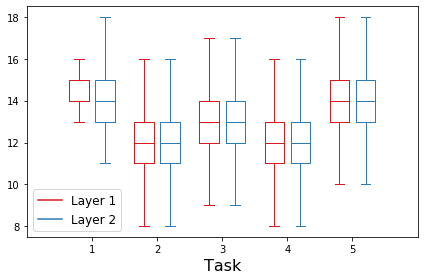

In [134]:
lw = 2

grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 16
tick_size = 12
legend_size = 12

num_layers = 2
num_tasks = 5
# fig, ax = plt.subplots(1, num_layers, figsize=(8, 4))
# ax[0].boxplot([np.sum(np.asarray(np.squeeze(Z_hibp[2*i] > 0.1)).astype(int), axis=1) for i in range(num_tasks)],
#                 labels=np.arange(5)+1)
# ax[1].boxplot([np.sum(np.asarray(np.squeeze(Z_hibp[2*i + 1] > 0.1)).astype(int), axis=1) for i in range(num_tasks)],
#                 labels=np.arange(5)+1)

# for i in range(num_layers):
#     ax[i].set_title("Layer {}".format(i+1), fontsize=title_size)
#     ax[i].set_xlabel('Task', fontsize=legend_size)
# #plt.savefig('plots/Zs_{0}.pdf'.format(tag), bbox_inches='tight')

ticks = [str(i) for i in np.arange(5)+1]

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()
bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(Z_hibp[2*i] > 0.1)).astype(int), axis=1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(Z_hibp[2*i + 1] > 0.1)).astype(int), axis=1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Layer 1')
plt.plot([], c='#2C7BB6', label='Layer 2')
plt.legend(fontsize=legend_size)

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
#plt.savefig('plots/Zs_{0}.pdf'.format(tag), bbox_inches='tight')
plt.show()

In [135]:
num_runs = 5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(Z_ibp[i][j])
    _Z_ibp.append(tmp)
    
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_ibp[0].shape

(5, 2185, 100)

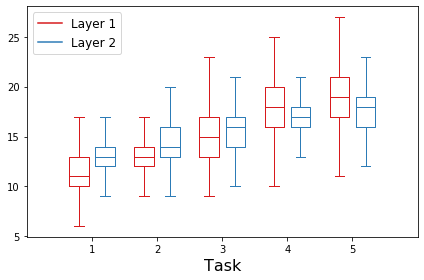

In [136]:
lw = 2

grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 16
tick_size = 12
legend_size = 12

num_layers = 2
num_tasks = 5
ticks = [str(i) for i in np.arange(5)+1]

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()
bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0-0.4, sym='', widths=0.6)
bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[2*i + 1] > 0.1)).astype(int), axis=2).reshape(-1) for i in range(num_tasks)],
                  positions=np.array(range(num_tasks))*2.0+0.4, sym='', widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Layer 1')
plt.plot([], c='#2C7BB6', label='Layer 2')
plt.legend(fontsize=legend_size)

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-2, len(ticks)*2)
plt.xlabel('Task', fontsize=label_size)
plt.tight_layout()
#plt.savefig('plots/Zs_{0}.pdf'.format(tag), bbox_inches='tight')
plt.show()